Goals: Lorentz gas diffusion

In [36]:
sh = (3,)
A = np.arange(np.prod(sh)).reshape(*sh)
B = np.rollaxis(A,-2,0)
B.shape

AxisError: axis -2 is out of bounds for array of dimension 1

In [78]:
A = mar([3,4,6])

def f1(A,ax=-1):
    return A.sum(axis=ax)#,keepdims=True)

def f2(A,ax=-1):
    B = np.rollaxis(A,ax,0)
    return np.einsum('i...->...',B)

np.allclose(f1(A),f2(A))
%timeit f1(A)
%timeit f2(A)

3.09 µs ± 101 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
4.59 µs ± 194 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [74]:
import numpy as np

def dot(A, B, axA=-1, axB=-2):
    C = np.rollaxis(A, axA, 0)
    if B.ndim > 1:
        D = np.rollaxis(B, axB, 0)
    else:
        D = B.copy()
    print(C.shape, D.shape)
    return np.einsum('i...,i...->', C, D)

def mar(sh):
    sh = np.asarray(sh)
    return np.arange(np.prod(sh)).reshape(*sh)

A = mar([3,4,6])
B = mar([7,6,9])
# dot(A,B,-2,-1).shape
A.dot(B)


array([[[[   495,    510,    525,    540,    555,    570,    585,    600,
             615],
         [  1305,   1320,   1335,   1350,   1365,   1380,   1395,   1410,
            1425],
         [  2115,   2130,   2145,   2160,   2175,   2190,   2205,   2220,
            2235],
         [  2925,   2940,   2955,   2970,   2985,   3000,   3015,   3030,
            3045],
         [  3735,   3750,   3765,   3780,   3795,   3810,   3825,   3840,
            3855],
         [  4545,   4560,   4575,   4590,   4605,   4620,   4635,   4650,
            4665],
         [  5355,   5370,   5385,   5400,   5415,   5430,   5445,   5460,
            5475]],

        [[  1305,   1356,   1407,   1458,   1509,   1560,   1611,   1662,
            1713],
         [  4059,   4110,   4161,   4212,   4263,   4314,   4365,   4416,
            4467],
         [  6813,   6864,   6915,   6966,   7017,   7068,   7119,   7170,
            7221],
         [  9567,   9618,   9669,   9720,   9771,   9822,   9873,   

In [21]:
import numpy as np

def make_onb(A):
    """
    Converts the rows of A into an orthonormal basis, adding extra vectors if necessary.
    """
    # np.linalg.qr implents QR-factorization via Gram-Schmidt.  It does almost all of the work for us.
    # Option 'complete' will add extra vectors if necessary to complete the basis.
    B = np.asarray(A).astype(float)
    if B.ndim == 1:
        B = B[np.newaxis,:]
    Q, R = np.linalg.qr(B.T, 'complete')
    
    # We are almost done - the columns of Q are almost the ONB we seek.
    # But we may need to multiply some columns by -1.  The lines below handle this. 
    S = R.diagonal()  # Negative entries correspond to the columns of Q that must be flipped
    idx = np.isclose(S, 0)
    S = np.sign(S)
    S[idx] = 1  # To prevent multiplying by 0
    W = np.ones(len(Q)-len(S))  # appending 1's if S is too short
    S = np.append(S,W)
    
    U = (Q*S).T  # Flips columns of Q that need it and then transpose so ONB is written in rows
    return U

A = np.array([1,2,3])
make_onb(A)

# B = n+p.array([[4,5,6],[7,8,9]])
# B = None
# np.vstack([A,B])
# np.append(A,B,axis=0)

array([[ 0.26726124,  0.53452248,  0.80178373],
       [-0.53452248,  0.77454192, -0.33818712],
       [-0.80178373, -0.33818712,  0.49271932]])

In [45]:
n,p = A.shape
Q2.shape
# Q2[:,:] = A[:,:]
W = Q2.copy()
W[:n] = A
s = (Q2.dot(W))
np.signs.diagonal()

AttributeError: 'numpy.ndarray' object has no attribute 'sign'

In [49]:
np.sign(R1.diagonal())

array([-1., -1.,  1.])

In [16]:
import numpy as np
# A = np.random.rand(3,4)
A = np.arange(3*4).reshape(3,4).astype(float)
A[2] = 3*A[1]
A = [1,2,3]


def p(A):
    idx = np.isclose(A,0)
    B = A.copy()
    B[idx] = 0
    print(B)

def gram_schmidt(A):
    # QR-factorization uses gram-schmidt.  np.linalg.qr will do almost all of the work for us.
    # Option 'complete' will add extra vectors if necessary to complete the basis.
    Q, R = np.linalg.qr(A.T, 'complete')
    # We are almost done - the columns of Q are almost the ONB we seek.
    # But we may need to multiply some columns by -1.  The lines below handle this. 
    S = R.diagonal()  # Negative entries correspond to the columns of Q that must be flipped
    idx = np.isclose(S, 0)
    S = np.sign(S)
    S[idx] = 1  # To prevent multiplying by 0
    W = np.ones(len(Q)-len(S))  # appending 1's if S is too short
    S = np.append(S,W)
    U = (Q*S).T  # Flips columns of Q that need it and then transpose so ONB is written in rows
    return U

U = gram_schmidt(A)


p(U)
p(U.dot(A.T))
p(U.dot(U.T))
# print(U)
# T = U.dot(A.T)
# print(U.dot(U.T))
# T[np.isclose(T,0)] = 0.0
# print(T)

AttributeError: 'list' object has no attribute 'T'

In [67]:
print(W.shape)
print(W.shape)
print(S)
# S


# S+
# np.diag(np.diag(R2))
U

(3,) (4, 4)
(1,)
[-1. -1.  1.  1.]


array([[-0.        ,  0.26726124,  0.53452248,  0.80178373],
       [ 0.83666003,  0.47809144,  0.11952286, -0.23904572],
       [-0.24811085,  0.69477494, -0.64521733,  0.19855324],
       [-0.48830422,  0.46614138,  0.53262988, -0.51046705]])

In [46]:
import numpy as np
# A = np.random.rand(3,4)
A = np.arange(3*4).reshape(3,4).astype(float)
A[2] = 3*A[1]

def mag(X, axis=0):
    X = X.astype(float)
    Y = (X**2).sum(axis, keepdims=True)
    return np.sqrt(Y)

def make_unit(X, axis=0):
    X = X.astype(float)
    M = mag(X, axis)
#     print(M)
    M[np.abs(M) < 1e-4] = 1.0
#     M = np.expand_dims(M,axis)
    return X / M

def GS(A):
    U = np.zeros_like(A)
    U[0,:] = make_unit(A[0])
#     print(U)
    for i in range(1, A.shape[0]):
        #v = .copy()
    #     c = U.dot(v)
    #     p = c.dot(U)
        p = A[i].dot(U.T).dot(U)
        w = A[i] - p
        U[i,:] = make_unit(w)
    return U
U = GS(A)

Q1, R1 = np.linalg.qr(A.T)#,'complete')
Q1 = Q1.T
Q2, R2 = np.linalg.qr(A.T,'complete')
Q2 = Q2.T
print(U)
print()
print(Q1)
print()
print(Q2)

print(U[2]/Q1[2])

[[  0.00000000e+00   2.67261242e-01   5.34522484e-01   8.01783726e-01]
 [  8.36660027e-01   4.78091444e-01   1.19522861e-01  -2.39045722e-01]
 [  5.32907052e-15   3.55271368e-15   3.55271368e-15   3.55271368e-15]]

[[ 0.         -0.26726124 -0.53452248 -0.80178373]
 [-0.83666003 -0.47809144 -0.11952286  0.23904572]
 [-0.24811085  0.69477494 -0.64521733  0.19855324]]

[[ 0.         -0.26726124 -0.53452248 -0.80178373]
 [-0.83666003 -0.47809144 -0.11952286  0.23904572]
 [-0.24811085  0.69477494 -0.64521733  0.19855324]
 [-0.48830422  0.46614138  0.53262988 -0.51046705]]
[ -2.14785875e-14   5.11347416e-15  -5.50622790e-15   1.78930025e-14]


In [105]:
A = np.random.rand(3,4)
print(np.diag(np.diag(A)))

[[ 0.18245755  0.          0.        ]
 [ 0.          0.69957352  0.        ]
 [ 0.          0.          0.25113073]]


In [112]:
import numpy as np

def mag(X, axis=0):
    Y = (X**2).sum(axis)
    return np.sqrt(Y)

def make_unit(X, axis=0):
    M = mag(X, axis)
    M = np.expand_dims(M,axis)
    return X / M

A = np.random.rand(3,4)
A[2] = 3*A[1]
# A = np.arange(4).reshape(1,4).astype(float)
print(A)
ax = 1
print(mag(A,axis=ax))
U = make_unit(A,axis=ax)
print(mag(U,axis=ax))
ONB = np.linalg.qr(A.T,'complete')[0].T
print(ONB)
U = np.zeros_like(A)
print(make_unit(A[0]))
U[0,:] = make_unit(A[0])
print(U)

for i in range(1, A.shape[0]):
    #v = .copy()
#     c = U.dot(v)
#     p = c.dot(U)
    p = A[i].dot(U.T).dot(U)
    w = A[i] - p
    U[i] = make_unit(w)
print()
print(A)
print(ONB)

print(U)
# print(U.dot(U.T))
# print(mag(ONB,axis=0))
s = np.sign(np.diag(np.diag(A.dot(ONB))))
# s = np.sign(A.dot(ONB))
# s.dot(ONB)
s

[[ 0.04386394  0.03420098  0.21590713  0.8625714 ]
 [ 0.80851399  0.78172831  0.27090047  0.60730409]
 [ 2.42554196  2.34518494  0.81270142  1.82191226]]
[ 0.89092035  1.30652185  3.91956555]
[ 1.  1.  1.]
[[-0.04923441 -0.03838837 -0.24234167 -0.96818016]
 [-0.71041766 -0.69300949 -0.08785305  0.08559456]
 [ 0.68003623 -0.71932337  0.13606994 -0.04011955]
 [ 0.17445182 -0.02894929 -0.95657584  0.23171356]]
[ 0.04923441  0.03838837  0.24234167  0.96818016]
[[ 0.04923441  0.03838837  0.24234167  0.96818016]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]

[[ 0.04386394  0.03420098  0.21590713  0.8625714 ]
 [ 0.80851399  0.78172831  0.27090047  0.60730409]
 [ 2.42554196  2.34518494  0.81270142  1.82191226]]
[[-0.04923441 -0.03838837 -0.24234167 -0.96818016]
 [-0.71041766 -0.69300949 -0.08785305  0.08559456]
 [ 0.68003623 -0.71932337  0.13606994 -0.04011955]
 [ 0.17445182 -0.02894929 -0.95657584  0.23171356]]
[[ 0.04923441  0.03838837

array([[ 1.,  0.,  0.],
       [ 0., -1.,  0.],
       [ 0.,  0., -1.]])

In [52]:
# i = 2
# j = 1
print(ONB.dot(ONB.T))

# print(ONB.shape)
# i = 1
# ONB[i]/A[i]
print(ONB[0])
print(U[0])
v = A[1] - A[1].dot(U[0]) * U[0]
print(v)
w = v / np.sqrt(v.dot(v))
print(w)
print(ONB)

[[0 1 2 3]
 [0 3 6 9]]
[  3.74165739  11.22497216]
[ 1.  1.]
[[  1.00000000e+00  -3.46944695e-16   0.00000000e+00  -1.38777878e-17]
 [ -3.46944695e-16   1.00000000e+00  -1.11022302e-16  -1.94289029e-16]
 [  0.00000000e+00  -1.11022302e-16   1.00000000e+00  -2.77555756e-17]
 [ -1.38777878e-17  -1.94289029e-16  -2.77555756e-17   1.00000000e+00]]
[ 0.         -0.26726124 -0.53452248 -0.80178373]
[ 0.          0.26726124  0.53452248  0.80178373]
[ 0.  0.  0.  0.]
[ nan  nan  nan  nan]
[ 0.9786857   0.07363702  0.14727404 -0.12272837]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in true_divide


In [38]:
np.full([3,4], np.inf)

array([[ inf,  inf,  inf,  inf],
       [ inf,  inf,  inf,  inf],
       [ inf,  inf,  inf,  inf]])

In [35]:
side = 10
particle_radius = 2
scatter_radius_crit = (side - particle_radius)/2**(1/2) - particle_radius
scatter_radius = scatter_radius_crit * 1.1

num_walls = 5
hole = 0
max_steps = 200
seed = 49

%run -i lorentz_billiard_defs.py

part = Particles(num=3, radius=[3,4])

part.radius

array([3, 4, 4])

In [29]:
import numpy as np
def listify(X):
    if (X is None) or (X is np.nan):
        return []
    elif isinstance(X,str):
        return [X]
    else:
        try:
            return list(X)
        except:
            return [X]

x = None
# print(list(x))
l = listify(x)
print(l, len(l))
#p.isnan(x)
x is np.nan
x is str

[] 0


False

In [27]:
A = np.arange(6).reshape(3,2)
print(A)
A[[0,1]] = A[[1,0]]
print(A)

[[0 1]
 [2 3]
 [4 5]]
[[2 3]
 [0 1]
 [4 5]]


In [3]:
side = 10
particle_radius = 2
scatter_radius_crit = (side - particle_radius)/2**(1/2) - particle_radius
scatter_radius = scatter_radius_crit * 1.1

num_walls = 5
hole = 0
max_steps = 200
seed = 49

%run -i lorentz_billiard_defs.py

# x = rnd.uniform(-hole_range,hole_range)
# y = -y_range
# speed = 1.0
# theta = rnd.uniform(0,np.pi)
# result = run_trial(x=x, y=y, speed=1.0, theta=theta, max_escapes = 1000)

result = run_trial()#max_escapes = 1000)

# payoff_rate = np.array([[-1,1,0,0,0],[0,0,-1,1,0]]).T
# wall_ranges = np.array([2*x_range, 2*x_range, 2*y_range, 2*y_range, 2*np.pi*scatter_range])
# wall_proportion = wall_ranges / wall_ranges.sum() 
#with np.errstate(all='ignore'):
    #games = result['escapes']+1
 #   result['total_payoff'] = result['wall_col'].dot(payoff_rate)
    #result['ave_payoff'] = payoff / games
    #result['expected_payoff'] = (wall_ranges / (2*hole_range)).dot(payoff_rate)
# result = run_trial(max_escapes = 100)

draw_hist(result)

A Jupyter Widget

In [13]:
result['total_payoff']

array([[  0,   0],
       [  0,   0],
       [  1,   0],
       ..., 
       [-57,   1],
       [-57,   0],
       [-56,   0]])

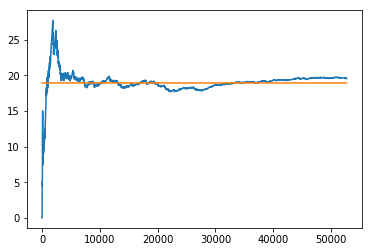

In [3]:
plt.plot(result['ave_payoff'])
plt.plot(result['expected_payoff'] + 0*result['ave_payoff'])
plt.show()